## House Price Prediction 

1. Import the data and necessary libraries for the project

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option('display.max_columns',None,'display.max_rows',None)

In [212]:
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [213]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [214]:
C_F = [test for test in df.columns if df[test].dtypes =='O']
C_F

['date', 'street', 'city', 'statezip', 'country']

In [215]:
df[C_F].nunique()

date          70
street      4525
city          44
statezip      77
country        1
dtype: int64

In [216]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [217]:
A= pd.DataFrame(df['street'].unique())

In [218]:
df['street'].unique()

array(['18810 Densmore Ave N', '709 W Blaine St',
       '26206-26214 143rd Ave SE', ..., '759 Ilwaco Pl NE',
       '5148 S Creston St', '18717 SE 258th St'], dtype=object)

In [219]:
# A.rename(columns={0:'name'},inplace = True)
# B=A.name.str.split(' ',n= -1,expand=True)

# Directions = ['N','S','W','E','NW','NE','SE','SW']
# Direct=[]
# for test in B.values:
#     for i in test:
#         if i in Directions:
#             Direct.append(i)
#             pass
#         elif i not in Directions:
#             Direct.append('Central')
            
# # B['Direct']=Direct
# len(Direct)
# # len(B)


In [220]:
Directions = ['N','S','W','E','NW','NE','SE','SW']
Direct=[]
data = df.copy()
data['new'] = data.street.str.split()
for test in data['new']:
    i = list(set(test).intersection(set(Directions)))
    if len(i)>0:
        i=i[0]
        Direct.append(i)
    else:
        Direct.append('Central')

In [221]:
len(data)

4600

In [222]:
len(Direct)

4600

In [223]:
data['Dir']=Direct

In [224]:
data.drop(columns = 'new', inplace = True)

In [225]:
code= data.statezip.str.split('98',n=1,expand=True)
code = list(code.iloc[:,1])
data['code']=code
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Dir,code
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,N,133
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,W,119
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,SE,042
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,NE,008
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,NE,052


In [226]:
data['date']=pd.to_datetime(data['date'])

In [227]:
data.drop(columns=['street','statezip','country'],inplace = True)

In [228]:
data.rename(columns={'Dir':'part_of_city','code':'zipcode'},inplace=True)

In [229]:
data['zipcode'] =data['zipcode'].astype(int)

In [230]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,part_of_city,zipcode
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,N,133
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,W,119
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,SE,42
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,NE,8
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,NE,52


### Data Visualization

In [231]:
C_F = [test for test in data.columns if data[test].dtypes == 'O']
N_F = [test for test in data.columns if test not in C_F and data[test].dtypes!='<M8[ns]']
print(C_F,N_F)

['city', 'part_of_city'] ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode']


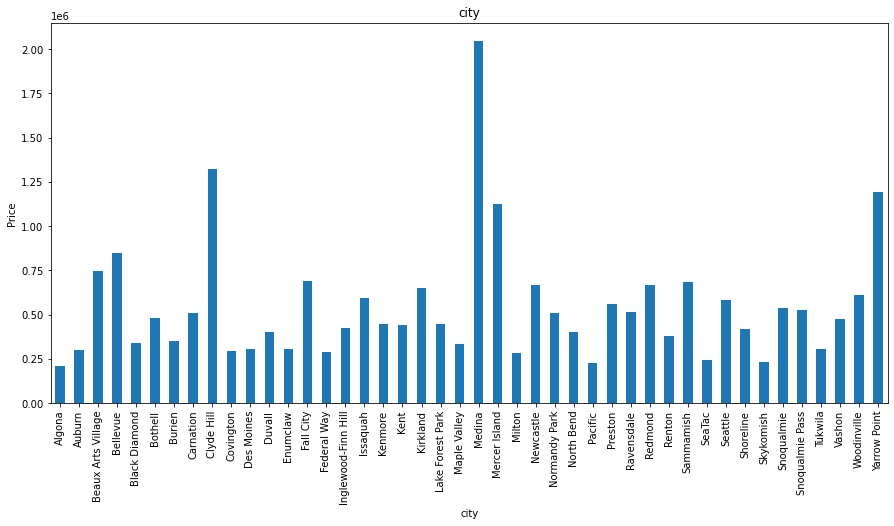

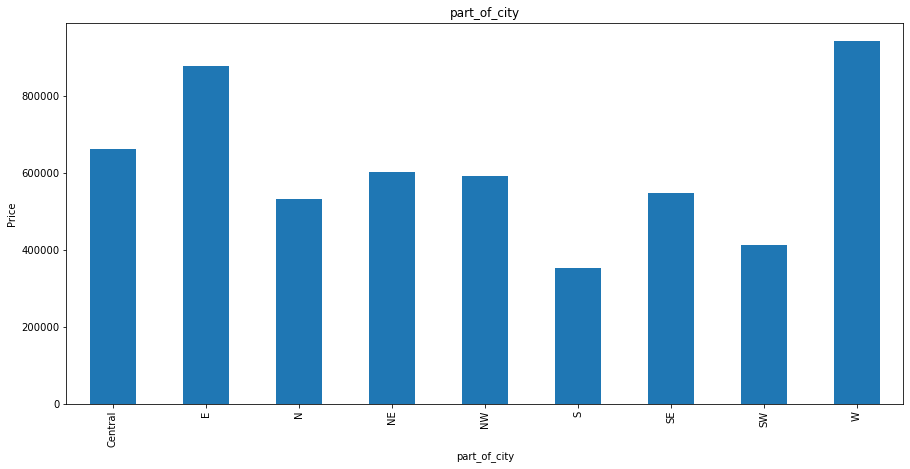

In [232]:
for test in C_F:
    plt.figure(figsize=(15,7))
    data.groupby(test)['price'].mean().plot.bar()
    plt.xlabel(test)
    plt.ylabel('Price')
    plt.title(test)
    plt.show()

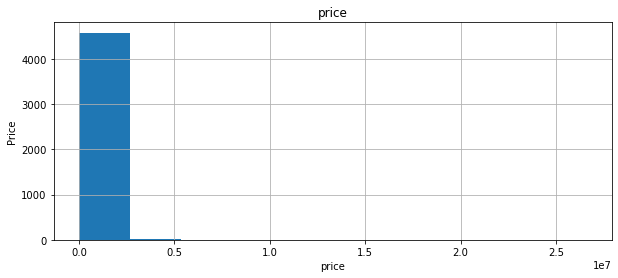

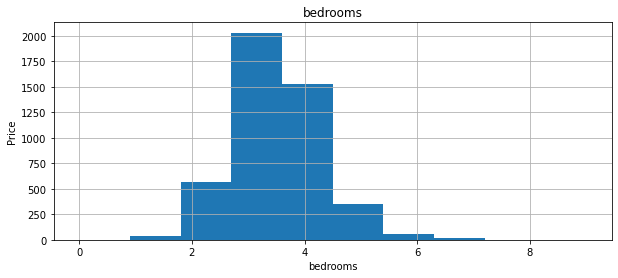

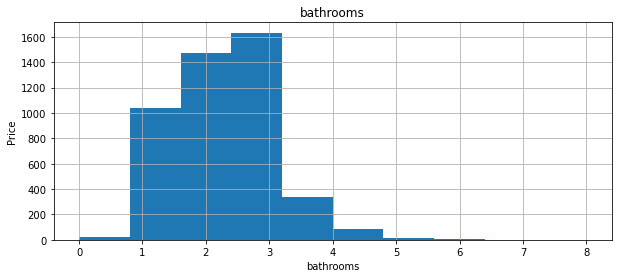

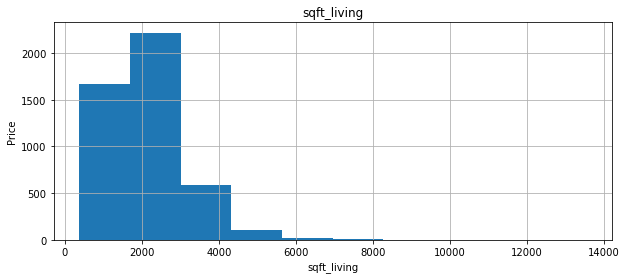

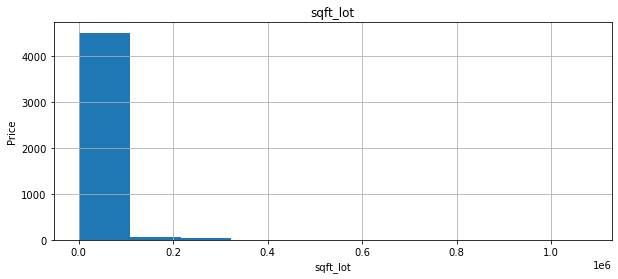

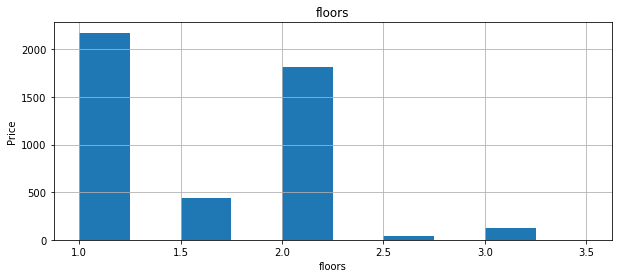

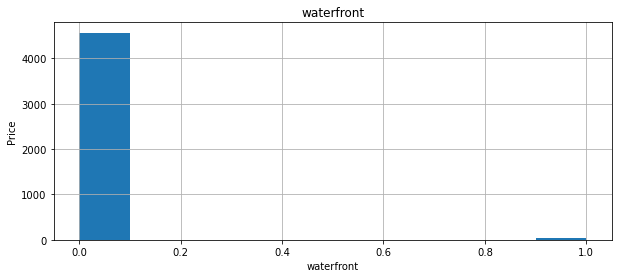

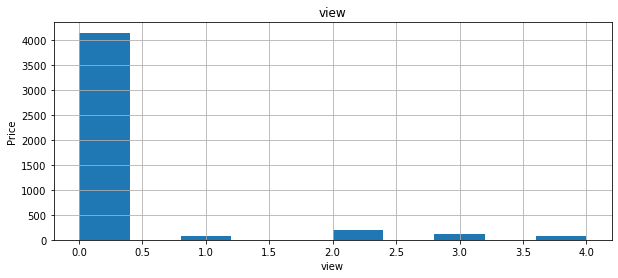

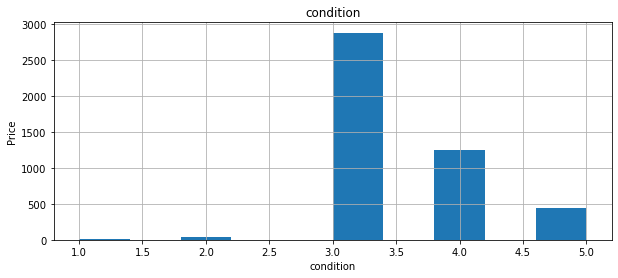

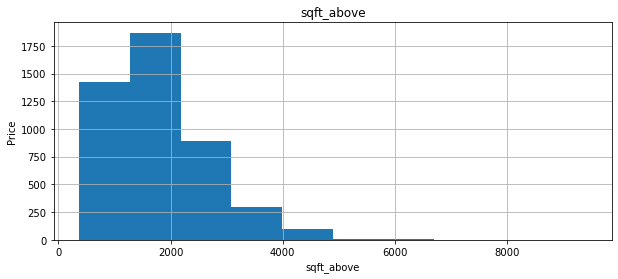

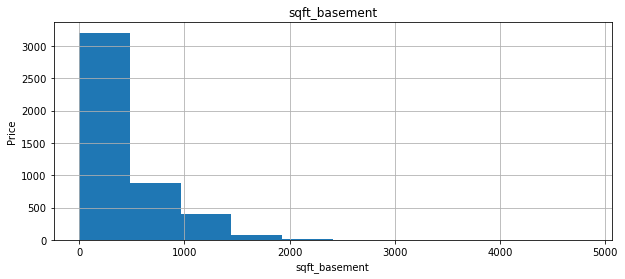

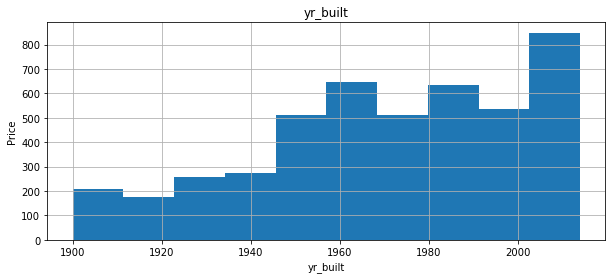

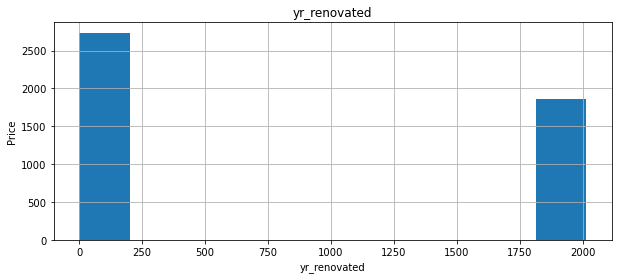

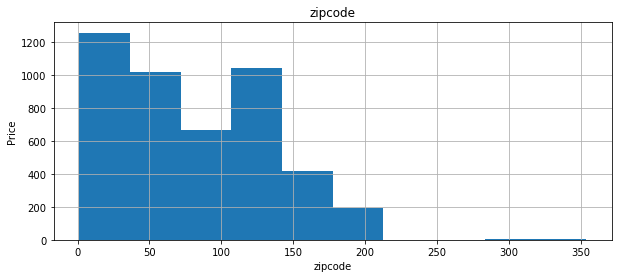

In [233]:
for test in N_F:
    plt.figure(figsize=(10,4))
    data[test].hist(bins=10)
    plt.xlabel(test)
    plt.ylabel('Price')
    plt.title(test)
    plt.show()

<AxesSubplot:xlabel='date'>

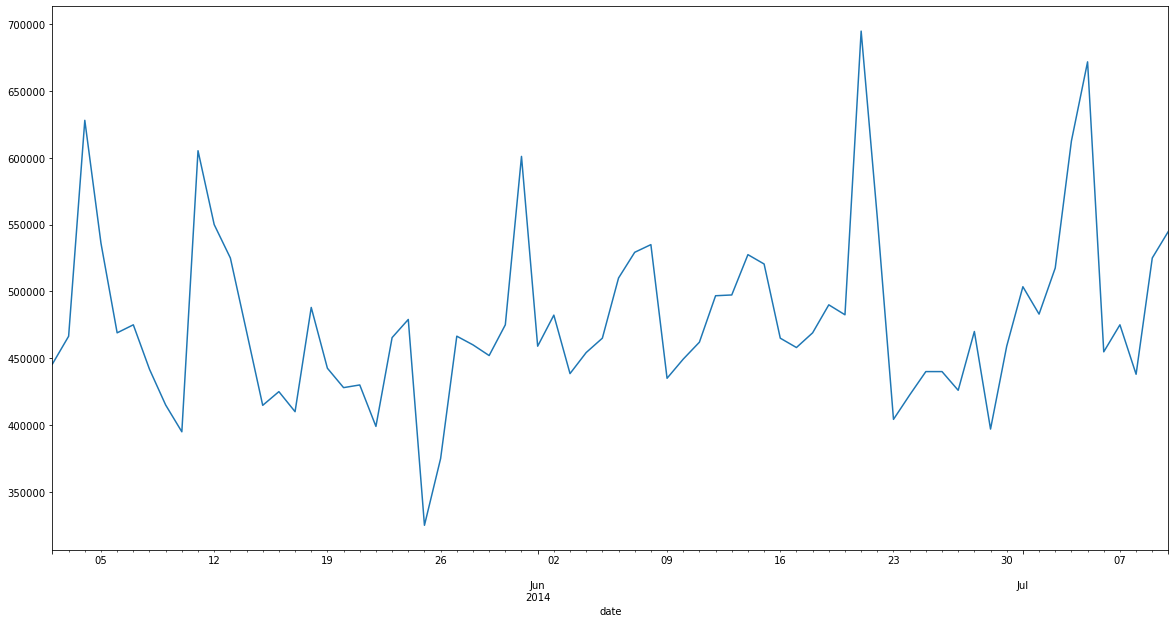

In [234]:
plt.figure(figsize=(20,10))
data.groupby('date')['price'].median().plot()


## Feature Selection

In [201]:
a=pd.get_dummies(data['city'],drop_first=True)

In [202]:
b=pd.get_dummies(data['part_of_city'],drop_first=True)

In [203]:
# data['date'] = data['date'].astype(object)

In [204]:
data=pd.concat([data.drop(columns=['city','part_of_city']),a,b],axis=1)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,Duvall,Enumclaw,Fall City,Federal Way,Inglewood-Finn Hill,Issaquah,Kenmore,Kent,Kirkland,Lake Forest Park,Maple Valley,Medina,Mercer Island,Milton,Newcastle,Normandy Park,North Bend,Pacific,Preston,Ravensdale,Redmond,Renton,Sammamish,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point,E,N,NE,NW,S,SE,SW,W
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [235]:
data['date'] = pd.to_numeric(pd.to_datetime(data['date']))

In [236]:
df=data

In [163]:
y = data.pop('price')
y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [165]:
x  = data.to_numpy()

In [262]:
data.dtypes.head()

date             int64
price          float64
bedrooms       float64
bathrooms      float64
sqft_living      int64
dtype: object

## libraries for Regression

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [168]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)

In [264]:
y_pred = regressor.predict(x_test)

In [173]:
score = r2_score(y_test,y_pred)
score

0.5558147538553466

In [174]:
mean_squared_error(y_test,y_pred)

65716506673.04847

In [175]:
mean_absolute_error(y_test,y_pred)

158223.59862524885

## 2nd Approach by mapping the values

In [265]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,part_of_city,zipcode
0,1398988800000000000,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,N,133
1,1398988800000000000,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,W,119
2,1398988800000000000,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,SE,42
3,1398988800000000000,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,NE,8
4,1398988800000000000,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,NE,52


In [238]:
C_F

['city', 'part_of_city']

In [266]:
d=df.copy()
for test in C_F:
    labels = df.groupby(test)['price'].mean().sort_values().index
    labels = {k:i for i,k in enumerate(labels)}
    d[test]=d[test].map(labels)

In [267]:
y = d.pop('price')
x = d.to_numpy()

In [257]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [258]:
y_pred = regressor.predict(x_test)

In [259]:
r2_score(y_test,y_pred)

0.6415023005277016

In [260]:
mean_absolute_error(y_test,y_pred)

131430.01449713216

In [261]:
mean_squared_error(y_test,y_pred)

51186354478.10934